<a href="https://colab.research.google.com/github/poltorashka-s-BMa/course-os-linux/blob/main/UCSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

КККК

In [ ]:

!pip install pyBigWig


import pyBigWig
import urllib.parse
from IPython.display import IFrame


methylation_files = [
    "/content/SRR5836473_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw",
    "/content/SRR5836474_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw",

]

coverage_files = [
    "/content/SRR5836473_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw",
    "/content/SRR5836474_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw",]


import os
for file in methylation_files + coverage_files:
    if not os.path.exists(file):
        print(f" Файл не найден: {file}")
    else:
        print(f" Файл найден: {file}")

def make_track(file, name, color, track_type):
    if track_type == "methylation":
        return (
            f"track type=bigWig name='{name}' "
            f"description='{name}' visibility=full "
            f"color={color} autoScale=on "
            f"graphType=points viewLimits=0:1 "
            f"bigDataUrl={file}"
        )
    else:
        return (
            f"track type=bigWig name='{name}' "
            f"description='{name}' visibility=full "
            f"color={color} autoScale=on "
            f"graphType=bar viewLimits=0:100 "
            f"bigDataUrl={file}"
        )


tracks = []
colors = ["255,0,0", "0,255,0", "0,0,255", "255,255,0"]


for i, file in enumerate(methylation_files):
    tracks.append(make_track(file, f"Met{i+1}", colors[i], "methylation"))


for i, file in enumerate(coverage_files):
    tracks.append(make_track(file, f"Cov{i+1}", colors[i], "coverage"))


params = {
    "db": "mm10",
    "position": "chr13",
    "hgct_customText": "\n".join(tracks)
}

ucsc_url = "https://genome.ucsc.edu/cgi-bin/hgTracks?" + urllib.parse.urlencode(params, safe=":/")

print("\nUCSC URL:")
print(ucsc_url)

try:
    display(IFrame(ucsc_url, width=1000, height=600))
except:
    print("\nНе удалось отобразить в iframe.")

✅ Файл найден: /content/SRR5836473_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw
✅ Файл найден: /content/SRR5836474_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw
✅ Файл найден: /content/SRR5836473_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw
✅ Файл найден: /content/SRR5836474_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw

UCSC Genome Browser URL:
https://genome.ucsc.edu/cgi-bin/hgTracks?db=mm10&position=chr13&hgct_customText=track+type%3DbigWig+name%3D%27Met1%27+description%3D%27Met1%27+visibility%3Dfull+color%3D255%2C0%2C0+autoScale%3Don+graphType%3Dpoints+viewLimits%3D0:1+bigDataUrl%3D/content/SRR5836473_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw%0Atrack+type%3DbigWig+name%3D%27Met2%27+description%3D%27Met2%27+visibility%3Dfull+color%3D0%2C255%2C0+autoScale%3Don+graphType%3Dpoints+viewLimits%3D0:1+bigDataUrl%3D/content/SRR5836474_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw%0Atrack+type%3DbigWig+name%3D%27Cov1%27+description%3D%27C

In [ ]:
pip install plotly

In [ ]:
pip install pyBigWig matplotlib

Файл доступен: /content/SRR5836473_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw
Файл доступен: /content/SRR5836474_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw


<ipython-input-5-eef85a191dd1>:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


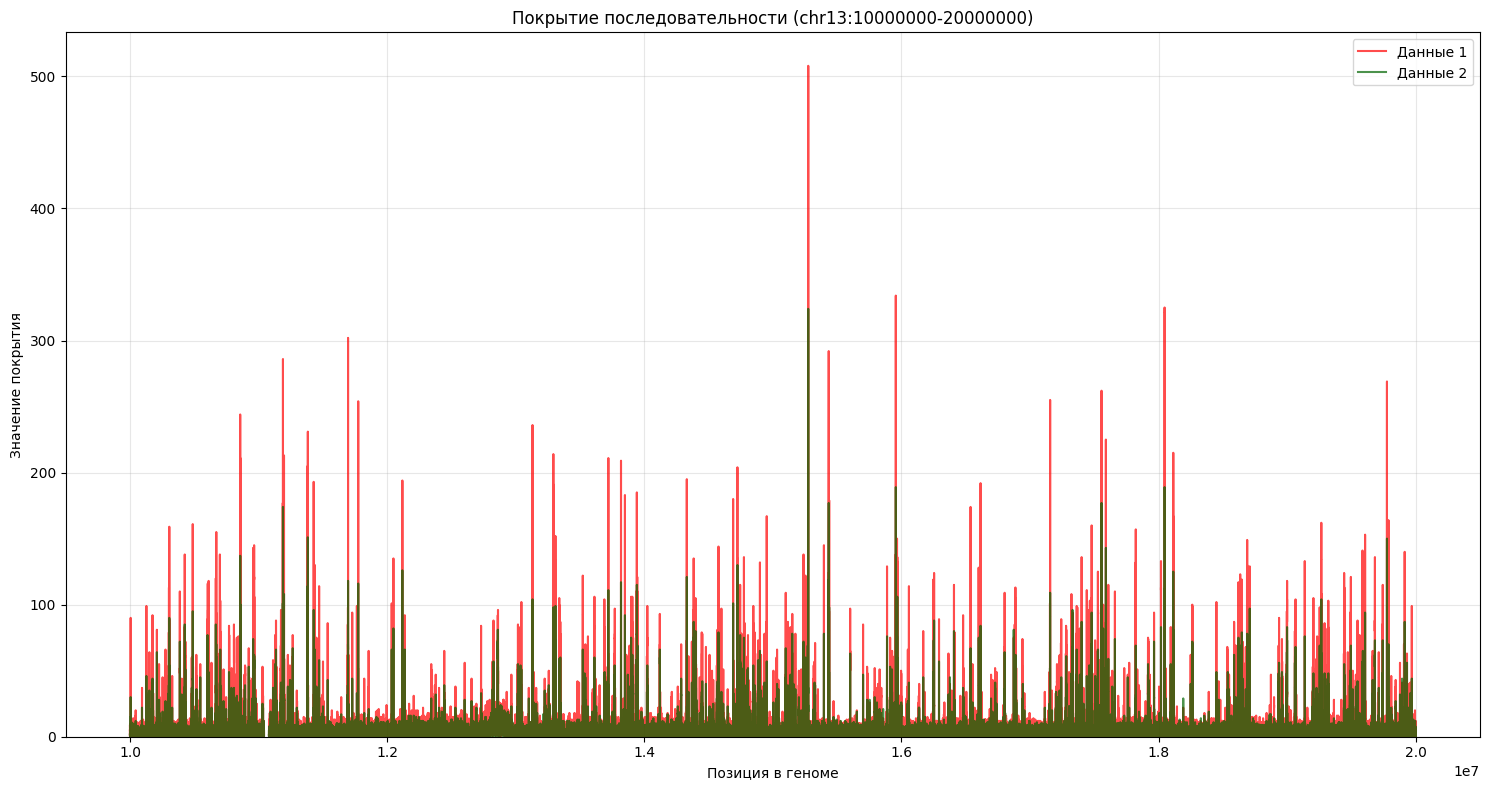

In [ ]:
import pyBigWig
import matplotlib.pyplot as plt
import os


files = [ "/content/SRR5836473_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw",
    "/content/SRR5836474_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw"
]

for file in files:
    if not os.path.exists(file):
        print(f"Файл не найден - {file}")
    else:
        print(f"Файл доступен: {file}")


colors = ['red', 'green', 'blue', 'purple']


plt.figure(figsize=(15, 8))


chrom = "chr13"
start = 10_000_000
end = 20_000_000


for i, (file, color) in enumerate(zip(files, colors), 1):
    try:

        bw = pyBigWig.open(file)


        values = bw.values(chrom, start, end)
        positions = range(start, end)


        plt.plot(positions, values, label=f"Данные {i}", color=color, alpha=0.7)

        bw.close()
    except Exception as e:
        print(f"Ошибка {file}: {str(e)}")


plt.title(f"Покрытие последовательности ({chrom}:{start}-{end})")
plt.xlabel("Позиция в геноме")
plt.ylabel("Значение покрытия")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

Файл доступен: /content/SRR5836473_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw
Файл доступен: /content/SRR5836474_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw
Файл доступен: /content/SRR5836473_1_val_1_bismark_bt2_pe.deduplicated.final_CpGs.chr13.bw
Длина chr13: 120421639


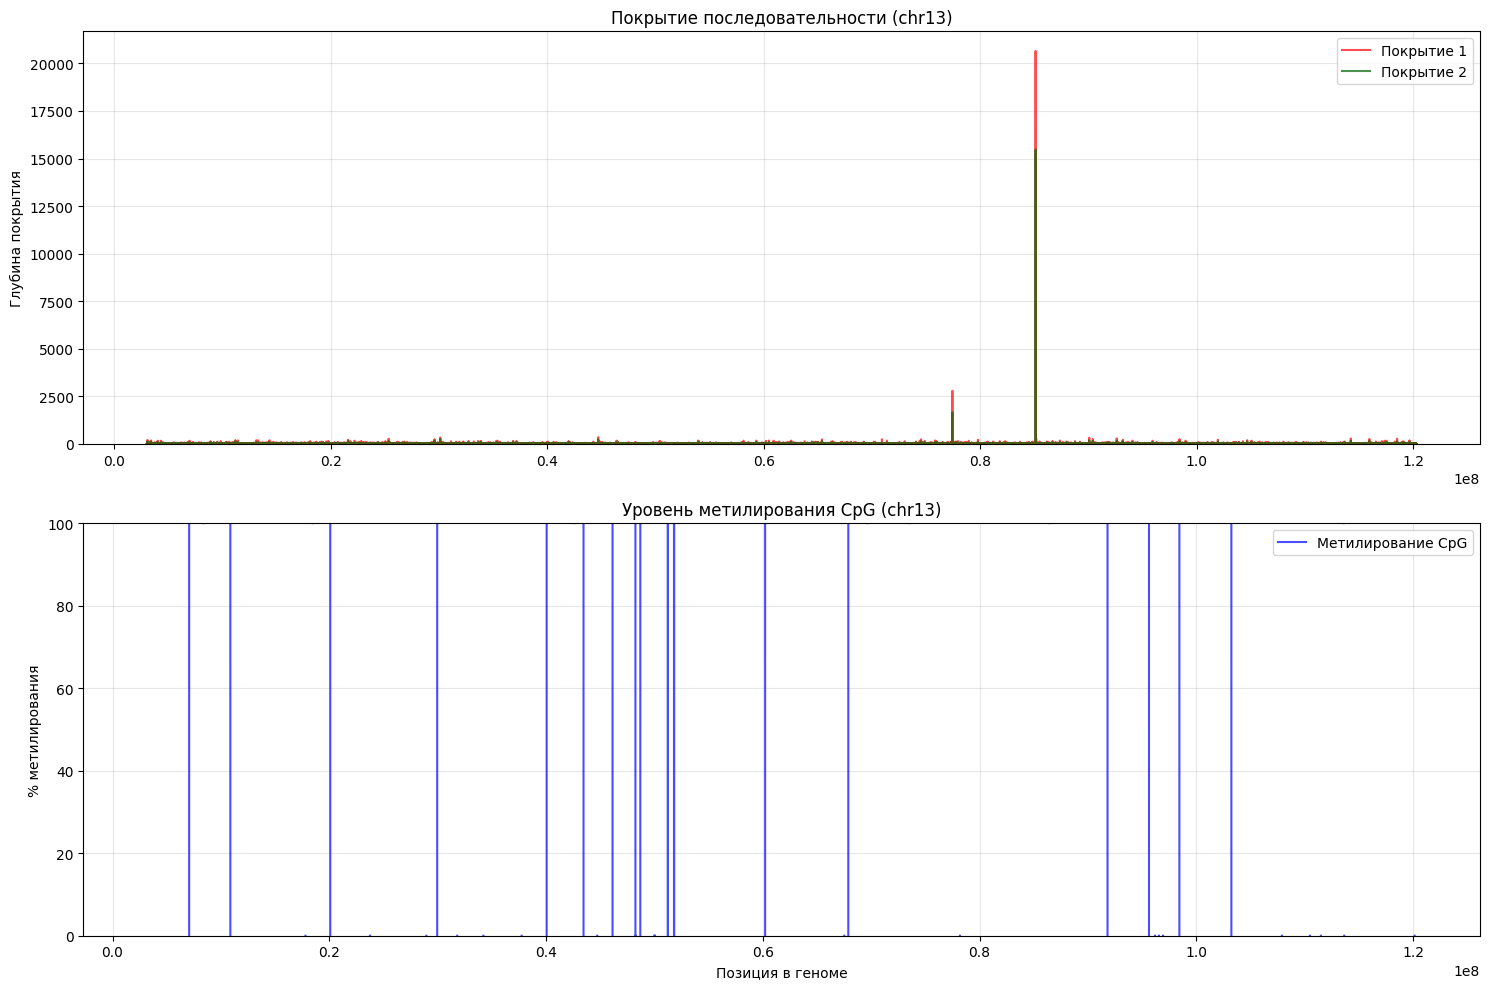

In [ ]:
import pyBigWig
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os

coverage_files = [
    "/content/SRR5836473_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw",
    "/content/SRR5836474_1_val_1_bismark_bt2_pe.deduplicated.chr13.coverage.bw"
]

methylation_file = "/content/SRR5836473_1_val_1_bismark_bt2_pe.deduplicated.final_CpGs.chr13.bw"


all_files = coverage_files + [methylation_file]
for file in all_files:
    if not os.path.exists(file):
        print(f"Ошибка: Файл не найден - {file}")
    else:
        print(f"Файл доступен: {file}")

try:
    bw = pyBigWig.open(coverage_files[0])
    chrom_length = bw.chroms()["chr13"]
    bw.close()
    print(f"Длина chr13: {chrom_length}")
except Exception as e:
    print(f"Не удалось определить длину хромосомы: {str(e)}")
    chrom_length = 100_000_000


fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])


ax1 = plt.subplot(gs[0])
colors = ['red', 'darkgreen']

for i, (file, color) in enumerate(zip(coverage_files, colors), 1):
    try:
        bw = pyBigWig.open(file)
        values = bw.values("chr13", 0, chrom_length)
        positions = range(0, chrom_length, 1000)
        values = values[::1000]
        ax1.plot(positions, values, label=f"Покрытие {i}", color=color, alpha=0.7)
        bw.close()
    except Exception as e:
        print(f"Ошибка при обработке файла {file}: {str(e)}")

ax1.set_title("Покрытие последовательности (chr13)")
ax1.set_ylabel("Глубина покрытия")
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(bottom=0)

ax2 = plt.subplot(gs[1])
try:
    bw = pyBigWig.open(methylation_file)
    values = bw.values("chr13", 0, chrom_length)
    positions = range(0, chrom_length, 1000)
    values = [v*100 if v is not None else None for v in values[::1000]]

    ax2.plot(positions, values, label="Метилирование CpG", color='blue', alpha=0.7)
    bw.close()
except Exception as e:
    print(f"Ошибка при обработке файла метилирования: {str(e)}")

ax2.set_title("Уровень метилирования CpG (chr13)")
ax2.set_xlabel("Позиция в геноме")
ax2.set_ylabel("% метилирования")
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()